In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

Week1: Implement the Adder

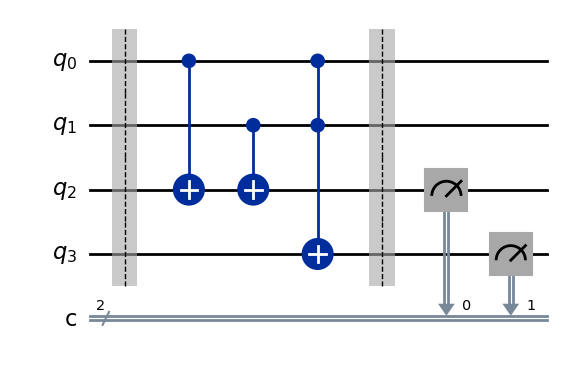

In [2]:
simulator = AerSimulator()

qc = QuantumCircuit(4,2)

qc.barrier()

qc.cx(0,2)
qc.cx(1,2)

qc.ccx(0,1,3)

qc.barrier()

qc.measure([2,3],[0,1])
display(qc.draw())

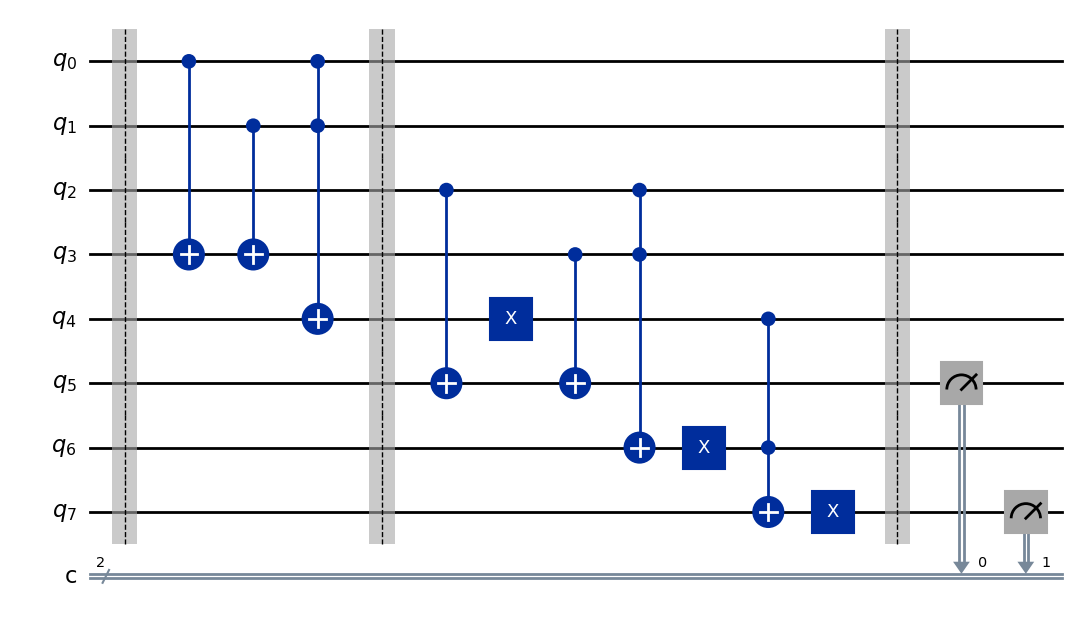

In [4]:
simulator = AerSimulator()

qc = QuantumCircuit(8,2)

#qc.h(0)
#qc.h(1)
#qc.h(2)
qc.barrier()
# do sum A, B
qc.cx(0,3)
qc.cx(1,3)
qc.ccx(0,1,4)
# do sum S, X
qc.barrier()
qc.cx(2,5)
qc.cx(3,5)
qc.ccx(2,3,6)

#do Or with 4 and 6
qc.x(4)
qc.x(6)
qc.ccx(4,6,7)
qc.x(7)
qc.barrier()

qc.measure([5,7],[0,1])
display(qc.draw())


Total counts: {'00': 10000}


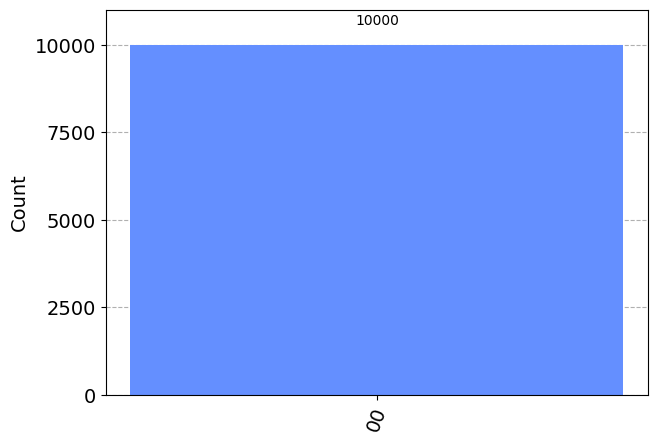

In [5]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)

plot_histogram(counts)

Calculating the Cost of the Circuit
The Cost is #_of_Single-qubit_gates + #_of_CX_gates * 10
With the current Noisy Intermediate-Scale Quantum (NISQ) devices, noises are introduced more heavily when implementing CX gates. Therefore, we will weigh CX gates 10 times more than a single-qubit gate for cost evaluation.

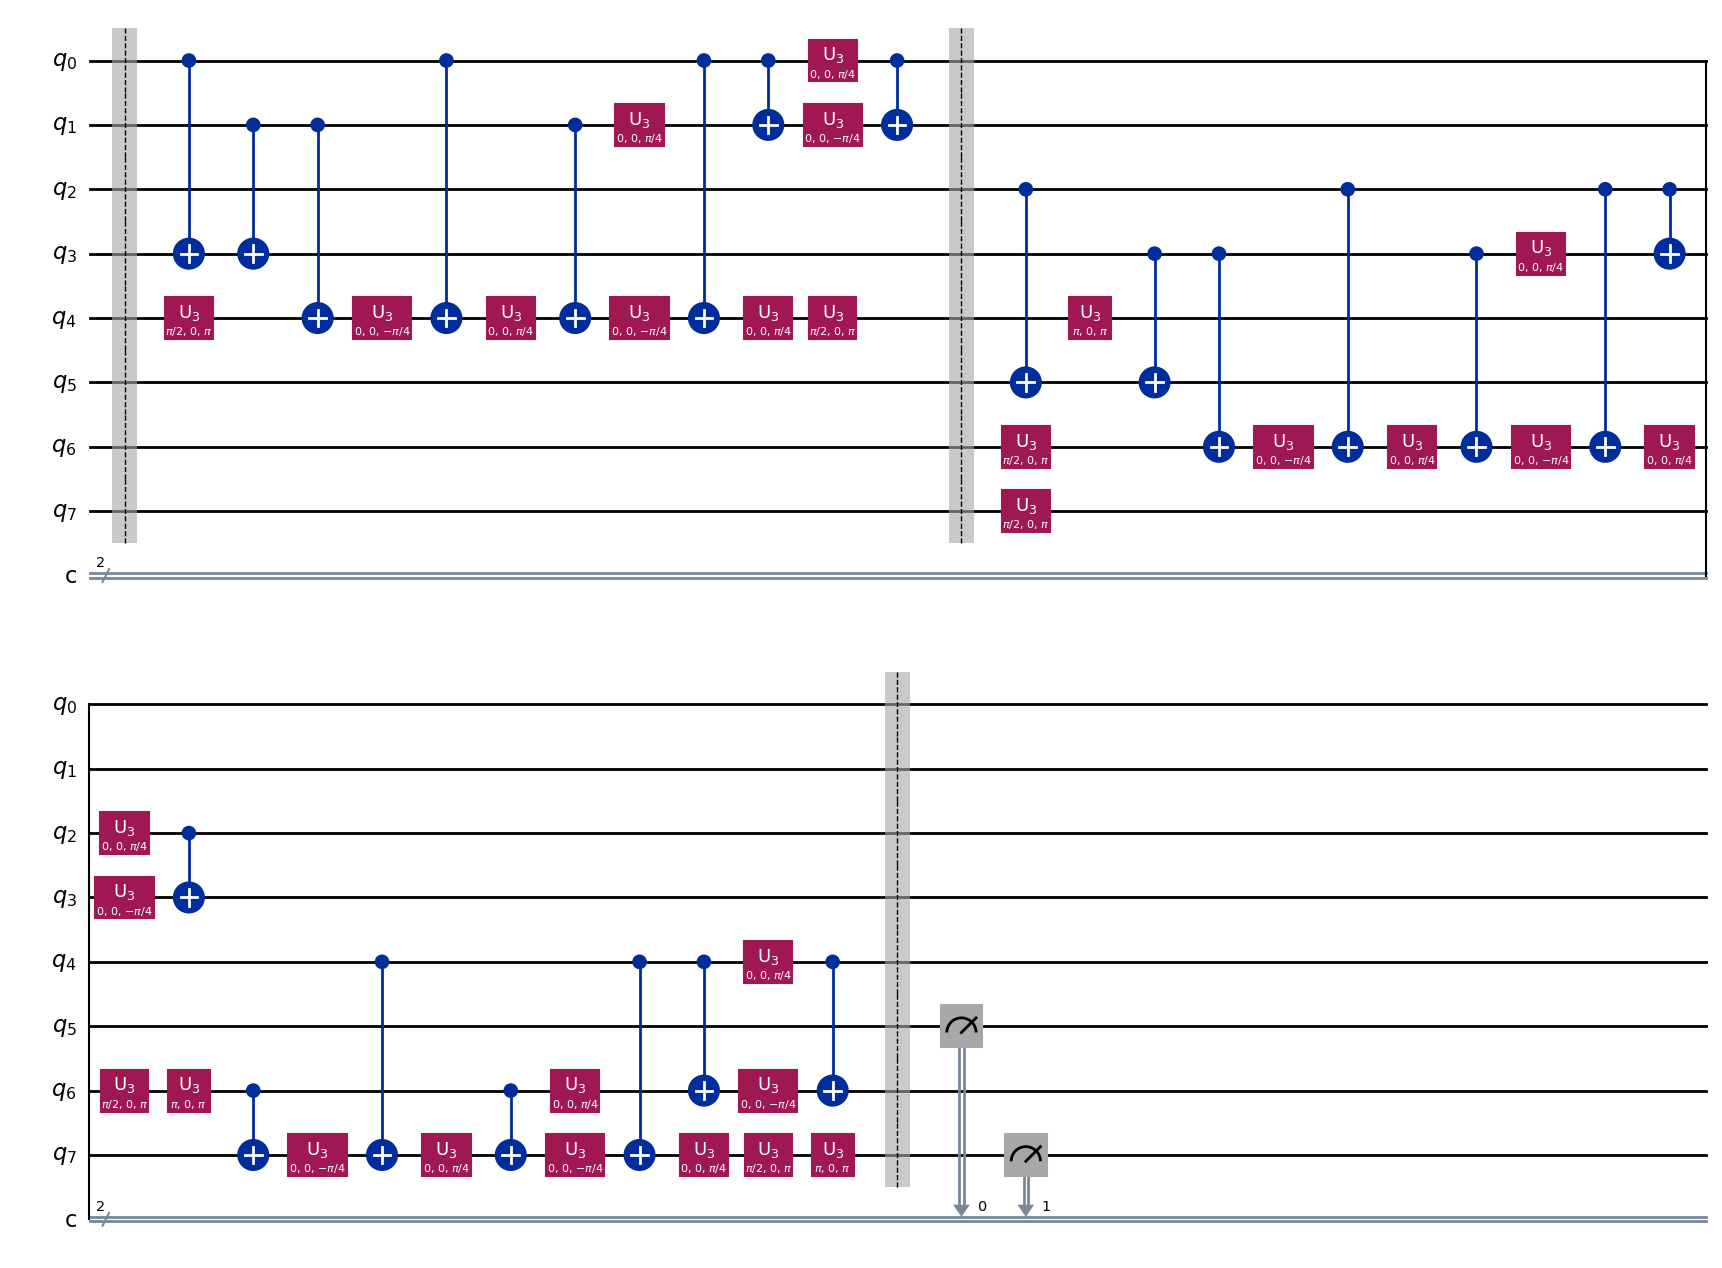

In [19]:
#now let's check the quantum cost of this circuit by using the Unroller.\
from qiskit.transpiler.passes import BasisTranslator, UnrollCustomDefinitions
from qiskit.transpiler import PassManager
from qiskit.circuit.library.standard_gates.equivalence_library import (StandardEquivalenceLibrary as std_eqlib,)

basis_gates = ['u3', 'cx']
pm = PassManager([
    #UnrollCustomDefinitions(std_eqlib, basis_gates)
    BasisTranslator(std_eqlib, basis_gates)
])

new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')



In [20]:
new_circuit.count_ops()

OrderedDict([('u3', 30), ('cx', 22), ('barrier', 3), ('measure', 2)])

In [ ]:
Cost  = 30 +22*10 = 250